# TP5 - Integración numérica

3) Codificar en Python la regla de Simpson compuesta, y estimar las siguientes integrales en $(0, \pi)$, para valores de n = 2, 4, 6, ..., hasta que dos aproximaciones sucesivas coincidan con un error de $10^{-6}$. 

Muestre el número de puntos requeridos en cada caso:

$a) \int x\cos(x^2)\,dx  \rightarrow I_v=-0.2151506085$ 

$b) \int x^2\cos(x)\,dx \rightarrow I_v=-2\pi=-6.283185307$ 

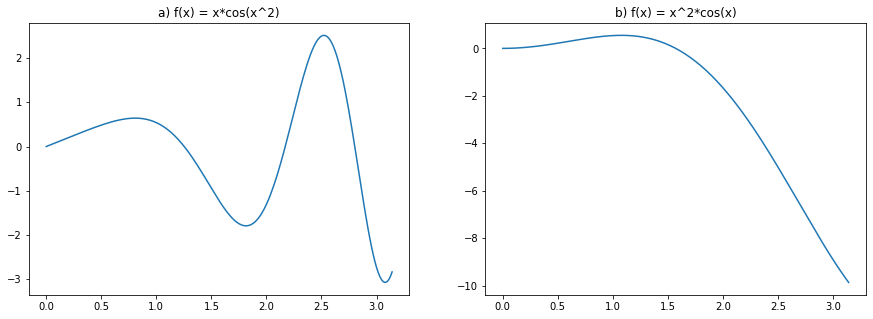

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#FUNCIONES
def fa(x):
    return x*np.cos(x**2)
def fb(x):
    return x**2*np.cos(x)
#GRÁFICAS
x = np.linspace(0,np.pi,200)
plt.figure(1,(15,5))
plt.subplot(121).title.set_text("a) f(x) = x*cos(x^2)")
plt.plot(x,fa(x))
plt.subplot(122).title.set_text("b) f(x) = x^2*cos(x)")
plt.plot(x,fb(x))
plt.show()

**Observaciones:** La función a) tiene más puntos de inflexión, puntos máximos y mínimos locales que la función b). Se espera que requiera mayor cantidad de puntos para evaluar la integral para llegar al orden de error deseado.

In [6]:
import numpy as np

# Regla de Simpson Compuesta
def simpsonCompuesta(f,a,b,imax,eps):
    '''
    Devuelve el valor aproximado de la integral
    f    = función definida y contínua en (a,b)
    a,b  = límites de integración
    imax = límite máximo de iteraciones
    eps  = cota de error buscada
    '''
    # Inicializo variables
    # Regla de Simpson Simple
    iSC = (f(a)+4*f((a+b)/2)+f(b))*(b-a)/6 #generalizar!!!
    n = 2
    it = 0
    error = eps+1
    
    while it<imax and error > eps:
        it = it+1
        n = n+2
        h = (b-a)/n
        xi = a
        par = 0
        impar = 0
        
        for k in range(1,n):
            xi=a+k*h #xi=xi+h
            if k%2!=0:
                impar = impar + f(xi)
            else:
                par = par + f(xi)
        aux = (f(a)+4*impar+2*par+f(b))*h/3
        error = np.abs(iSC-aux)
        iSC = aux
        
    if it >= imax:
        print("\n\t(máximo número de iteraciones alcanzado)")
    print("\n\tIntegral estimada:", '{:.7f}'.format(iSC), "\te <", '{:.2e}'.format(error), "\tpuntos tomados: ", n)
    
    #adicional, para calcular el error absoluto, devuelve el resultado
    return iSC

# IMPLEMENTACIÓN
a = 0
b = np.pi
imax = 30
eps = 1E-6

print("\na) f(x) = x*cos(x^2)")
ea = np.abs(simpsonCompuesta(fa,a,b,imax,eps)+0.2151506085)
print("\tError absoluto:", '{:.2e}'.format(ea))
print("\nb) f(x) = x^2*cos(x)")
ea = np.abs(simpsonCompuesta(fb,a,b,imax,eps)+2*np.pi)
print("\tError absoluto:", '{:.2e}'.format(ea))

# !!?? El ea no puede ser mayor que la cota calculada


a) f(x) = x*cos(x^2)

	Integral estimada: -0.2151570 	e < 9.75e-07 	puntos tomados:  56
	Error absoluto: 6.34e-06

b) f(x) = x^2*cos(x)

	Integral estimada: -6.2831813 	e < 9.09e-07 	puntos tomados:  40
	Error absoluto: 3.99e-06



**Observaciones:** Se llega a reducir el error al valor deseado, sin embargo, el error absoluto es mayor al acotado. Los errores propagados se incrementan con el número de iteraciones, y a partir de un h crítico será más predominante el error de redondeo que el error de truncamiento.   

In [7]:
a = 0
b = np.pi
imax = 30
eps = 1E-2

print("\na) f(x) = x*cos(x^2)")
ea = np.abs(simpsonCompuesta(fa,a,b,imax,eps)+0.2151506085)
print("\tError absoluto:", '{:.2e}'.format(ea))
print("\nb) f(x) = x^2*cos(x)")
ea = np.abs(simpsonCompuesta(fb,a,b,imax,eps)+2*np.pi)
print("\tError absoluto:", '{:.2e}'.format(ea))


a) f(x) = x*cos(x^2)

	Integral estimada: -0.2152156 	e < 2.15e-03 	puntos tomados:  14
	Error absoluto: 6.50e-05

b) f(x) = x^2*cos(x)

	Integral estimada: -6.2806169 	e < 5.75e-03 	puntos tomados:  8
	Error absoluto: 2.57e-03


4) ¿Cuál de las siguientes integrales requiere un mayor número de evaluaciones de la función en el caso de utilizar la regla del Trapecio Compuesta, si se quiere obtener un error del orden de $10^{-6}$?

$a) \int_0^2 \sin(10x)\,dx  \rightarrow I_v=0.05919179$

$b) \int_0^1 e^{x^2}\,dx  \rightarrow I_v=1.46265175$

$c) \int_1^{10} \ln(x)\,dx  \rightarrow I_v=14.02585093$

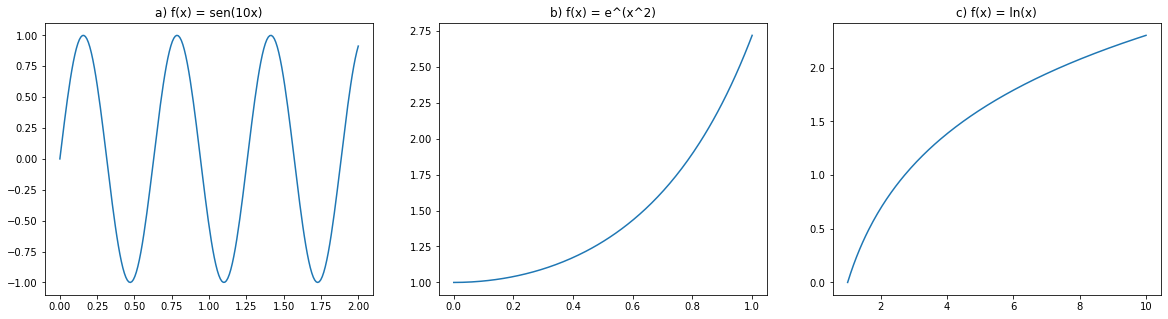

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#FUNCIONES
def fa(x):
    return np.sin(10*x)
def fb(x):
    return np.e**(x**2)
def fc(x):
    return np.log(x)
#GRAFICAS
xa = np.linspace(0,2,200)
xb = np.linspace(0,1,200)
xc = np.linspace(1,10,200)
plt.figure(1,(20,5))
plt.subplot(131).title.set_text("a) f(x) = sen(10x)")
plt.plot(xa,fa(xa))
plt.subplot(132).title.set_text("b) f(x) = e^(x^2)")
plt.plot(xb,fb(xb))
plt.subplot(133).title.set_text("c) f(x) = ln(x)")
plt.plot(xc,fc(xc))
plt.show()

+ Se espera que la integral de la funcion con mayor variabilidad (la curva que cambie más rápido en el intervalo) sea más dificil de aproximar.
+ En la función a) en los primeros tes ciclos la integral es cero porque se cancelan las partes (+) y (-). El valor de la integral depende del nro de ciclos.
+ En la función b) se reduce el intervalo (en comparación con a y c) por lo tanto se necesitarían menos puntos.
+ En la función c) el intervalo es mayor.

In [9]:
# Regla del Trapecio Compuesta
def trapecioCompuesta(f,a,b,imax,eps):
    '''
    f    = función definida y contínua en (a,b)
    a,b  = límites de integración
    imax = límite máximo de iteraciones
    eps  = cota de error buscada
    '''
    # Inicializo variables
    # Regla de Trapecio Simple
    iTC = (f(a)+f(b))*(b-a)/2 
    n = 1
    it = 0
    error = eps+1
    
    while it<imax and error > eps:
        it = it+1
        n = n+1
        h = (b-a)/n
        xi = a
        suma = 0
        
        for k in range(1,n):
            xi=a+k*h #xi=xi+h
            suma = suma + f(xi)
        aux = (f(a)+2*suma+f(b))*h/2
        error = np.abs(iTC-aux)
        iTC = aux
        
    if it >= imax:
        print("\n\t(máximo número de iteraciones alcanzado)")
    print("\n\tIntegral estimada:", '{:.7f}'.format(iTC), "\te <", '{:.2e}'.format(error), "\tpuntos tomados: ", n)
    
#     #adicional, para calcular el error absoluto, devuelve el resultado
    return iTC

# IMPLEMENTACIÓN
imax = 300
eps = 1E-6

print("\na) f(x) = sen(10x)")
print("\tError absoluto = ",'{:.2e}'.format(abs(trapecioCompuesta(fa,0,2,imax,eps)-0.05919179)))
print("\nb) f(x) = e^(x^2)")
print("\tError absoluto = ",'{:.2e}'.format(abs(trapecioCompuesta(fb,0,1,imax,eps)-1.46265175)))
print("\nc) f(x) = ln(x)")
print("\tError absoluto = ",'{:.2e}'.format(abs(trapecioCompuesta(fc,1,10,imax,eps)-14.02585093)))

##Consulta: cota de error pequeña


a) f(x) = sen(10x)

	Integral estimada: 0.0591137 	e < 9.92e-07 	puntos tomados:  159
	Error absoluto =  7.81e-05

b) f(x) = e^(x^2)

	Integral estimada: 1.4626989 	e < 9.78e-07 	puntos tomados:  98
	Error absoluto =  4.72e-05

c) f(x) = ln(x)

	Integral estimada: 14.0257371 	e < 9.92e-07 	puntos tomados:  231
	Error absoluto =  1.14e-04


**Observaciones:** Al igual que en el apartado anterior, las integrales que requirieron un mayor número de evaluaciones se alejaron más del valor verdadero. Se superó el h crítico.

In [10]:
print("\nc) f(x) = ln(x)")
print("\tError absoluto = ",'{:.2e}'.format(abs(trapecioCompuesta(fc,1,2,imax,eps)-0.3862943611)))


c) f(x) = ln(x)

	Integral estimada: 0.3862738 	e < 9.46e-07 	puntos tomados:  45
	Error absoluto =  2.06e-05


In [11]:
2*np.e*(3)

16.30969097075427